<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_04/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習
Kerasを使って、ディープラーニングのモデルを構築します。  
今回もIrisの分類を行います。  
指定した通りに、セルにPythonのコードを記述しましょう。

## データの準備
最初に、以下のセルを実行しましょう。  
ただし、コードは変更しないでください。

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

iris = datasets.load_iris()

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)

x = scaler.transform(iris.data)
# t = np_utils.to_categorical(iris.target)
t = to_categorical(iris.target)

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

## モデルの構築
`mode.summary()`により以下の結果が表示されるモデルを構築しましょう。

$$
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
=================================================================
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
None
$$

以下のセルの、指定した箇所にコードを追記してください。

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
# --- ここからコードを書く ---
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
# --- ここまで ---




# --- ここまで ---
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 

## 学習
構築したモデルを訓練しましょう。

In [3]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 0s 2ms/step - loss: 1.2246 - accuracy: 0.2589
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 1.1561 - accuracy: 0.2679
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3125
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0504 - accuracy: 0.3750
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0101 - accuracy: 0.5446
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.6161
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9374 - accuracy: 0.6161
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9048 - accuracy: 0.6071
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8735 - accuracy: 0.6161
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8405 - accuracy: 0.6339
Epoch 11/30
14/14 [

## 学習の推移
学習が問題なく行われたことを確認するために、学習の推移を見ましょう。

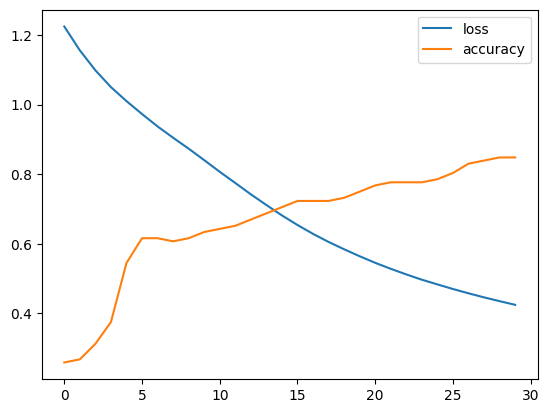

In [4]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

## 評価
モデルの評価を行いましょう。

In [5]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.4014 - accuracy: 0.8158
0.4013659954071045 0.8157894611358643


## 予測
学習済みのモデルを使って、予測を行いましょう。  

In [6]:
model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


array([[0.08728348, 0.34581634, 0.56690013],
       [0.95669335, 0.03350845, 0.00979825],
       [0.0813328 , 0.33756614, 0.5811011 ],
       [0.04107723, 0.23487617, 0.72404665],
       [0.01182154, 0.12101592, 0.8671626 ],
       [0.04468201, 0.21209455, 0.7432235 ],
       [0.01885906, 0.15749471, 0.8236463 ],
       [0.60492563, 0.2805128 , 0.11456141],
       [0.35122383, 0.43799675, 0.21077949],
       [0.95750016, 0.03284559, 0.00965434],
       [0.7886761 , 0.15501194, 0.05631202],
       [0.0063081 , 0.06538204, 0.92830986],
       [0.05921205, 0.29373813, 0.64704984],
       [0.81202495, 0.13859904, 0.049376  ],
       [0.928226  , 0.05470956, 0.01706435],
       [0.02893743, 0.19871365, 0.7723489 ],
       [0.06870499, 0.30126828, 0.63002676],
       [0.01852041, 0.15051924, 0.8309604 ],
       [0.88426507, 0.08817258, 0.02756227],
       [0.01570489, 0.13684614, 0.847449  ],
       [0.84503514, 0.1166032 , 0.03836165],
       [0.00301677, 0.05432735, 0.94265586],
       [0.

# 解答例
以下は解答例です。  
どうしてもわからない時のみ、参考にしましょう。

In [7]:
# --- ここからコードを書く ---
model.add(Dense(16, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
# --- ここまで ---